# Özellik Mühendisliği & Veri Ön İşleme(Feature Engineering & Data Preprocessing)

- Eğer veriniz kötüyse makine öğrenim araçlarınız kullanışlı olmayacaktır.
- Dünyanın en önemli kaynağı petrol değil veridir.
Özellik mühendisliği: Özellik üzerinde gerçekleştirilen çalışmalar ve ham veriden değişken üretmektir.
Veri Ön İşleme: Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

## OUTLIERS(Aykırı Değerler)
- Verideki genel eğilimin oldukça dışına çıkan değerlere **aykırı değer** denir.
- Özellikle doğrusal problemlerde aykırı değerlerin şiddeti oldukça güçlüdür.
- Ağaç yöntemlerinde bu etkiler daha düşüktür.

**Aykırı Değerler Neye Göre Belirlenir?**
- Sektör Bilgisi
- Standart Sapma Yaklaşımı
- Z-Skoru Yaklaşımı
- Boxplot(interquirtile range -IQR) Yaklaşımı => En çok tercih edilen yaklaşımdır.

## IQR (Interquartile Range)
<img src="https://i0.wp.com/ravenfo.com/wp-content/uploads/2021/02/kutu-grafigi.png?resize=612%2C400&ssl=1">

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from IPython.display import display

In [45]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.options.display.max_columns = None

In [46]:
def load_application_train():
    data = pd.read_csv("datasets/application_train.csv")
    return data


df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [47]:
def load():
    data = pd.read_csv("datasets/titanic.csv")
    return data


df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


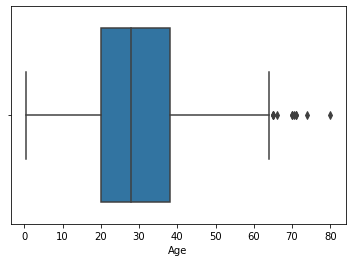

In [48]:
sns.boxplot(x=df["Age"])
plt.show()

### Aykırı Değerler Nasıl Yakalanır?

In [ ]:
# Çeyrekler Açıklığı hesaplanır
q1 = df["Age"].quantile(0.25) 
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1
# Üst aykırılık hesaplanır.
up = q3 + 1.5 * iqr
#Alt aykırılık hesaplanır.
low = q1 - 1.5 * iqr
print(display(df[(df["Age"] < low) | (df["Age"] > up)].head()))

In [ ]:
print(df[(df["Age"] < low) | (df["Age"] > up)].index)

#### Aykırı Değer Var Mı?

In [ ]:
print(df[(df["Age"] < low) | (df["Age"] > up)].any(axis=None))
#.any(axis=None) => boolean değer döndürür
print(df[(df["Age"] < low)].any(axis=None))

### Aykırı Değer Kontrolü

1. Eşik değer belirledik.
2. Aykırılara eriştik.
3. Hızlıca aykırı değer var mı yok diye sorduk.

## İşlemleri Fonksiyonlaştırma

In [ ]:
def outlierThresholds(dataframe, colName, q1=0.25, q3=0.75):
    quartile1 = dataframe[colName].quantile(q1)
    quartile3 = dataframe[colName].quantile(q3)
    interquantileRange = quartile3 - quartile1
    upLimit = quartile3 + 1.5 * interquantileRange
    lowLimit = quartile1 - 1.5 * interquantileRange
    return lowLimit, upLimit


print(outlierThresholds(df, "Age"))
print(outlierThresholds(df, "Fare"))

In [ ]:
low, up = outlierThresholds(df, "Age")
print(display(df[(df["Age"] < low) | (df["Age"] > up)]))

In [ ]:
print(df[(df["Age"] < low) | (df["Age"] > up)].index)

In [ ]:
def checkOutlier(dataframe, colName):
    lowLimit, upLimit = outlierThresholds(dataframe, colName)
    if dataframe[(dataframe[colName] > upLimit) | (dataframe[colName] < lowLimit)].any(axis=None):
        return True
    else:
        return False


print(checkOutlier(df, "Age"))
print(checkOutlier(df, "Fare"))

In [ ]:
dff = load_application_train()
dff.head()


def grabColNames(dataframe, catTh=10, carTh=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        catTh: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        carTh: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        catCols: list
                Kategorik değişken listesi
        numCols: list
                Numerik değişken listesi
        catButCar: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grabColNames(df))


    Notes
    ------
        catCols + numCols + catButCar = toplam değişken sayısı
        numButCat catCols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: catCols + numCols + catButCar = değişken sayısı

    """

    # catCols, catButCar
    catCols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numButCat = [col for col in dataframe.columns if dataframe[col].nunique() < catTh and
                 dataframe[col].dtypes != "O"]
    catButCar = [col for col in dataframe.columns if dataframe[col].nunique() > carTh and
                 dataframe[col].dtypes == "O"]
    catCols = catCols + numButCat
    catCols = [col for col in catCols if col not in catButCar]

    # numCols
    numCols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numCols = [col for col in numCols if col not in numButCat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'catCols: {len(catCols)}')
    print(f'numCols: {len(numCols)}')
    print(f'catButCar: {len(catButCar)}')
    print(f'numButCat: {len(numButCat)}')
    return catCols, numCols, catButCar


catCols, numCols, catButCar = grabColNames(df)

numCols = [col for col in numCols if col not in "PassengerId"]

for col in numCols:
    print(col, checkOutlier(df, col))

print("-------------------------------------")
catCols, numCols, catButCar = grabColNames(dff)

numCols = [col for col in numCols if col not in "SK_ID_CURR"]

for col in numCols:
    print(col, checkOutlier(dff, col))

# Aykırı Değerlerin Kendilerine Erişmek

In [ ]:
def grabOutliers(dataframe, colName, index=False):
    low, up = outlierThresholds(dataframe, colName)

    if dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].shape[0] > 10:
        print(display(dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].head()))
    else:
        print((dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))]))

    if index:
        outlier_index = dataframe[((dataframe[colName] < low) | (dataframe[colName] > up))].index
        return outlier_index


grabOutliers(df, "Age")

In [ ]:
grabOutliers(df, "Age", True) #indexleride  döndürür

In [ ]:
print(checkOutlier(df, "Age"))

In [ ]:
print(outlierThresholds(df, "Age"))

In [ ]:
print(grabOutliers(df, "Age", True))

# Aykırı Değer Problemi Çözme

3 Türlü baş edilir
- Ağaç yöntemlerinde hiç dokunmayabiliriz.
- Silme işlemi yapabiliriz.
- Baskılama yapabiliriz.

## Silme

In [ ]:
low, up = outlierThresholds(df, "Fare")
# Gözlem sayısına bakalım
print(df.shape)

# Aykırı olmayan gözlem sayılarına bakalım
print(df[~((df["Fare"] < low) | (df["Fare"] > up))].shape)

In [ ]:
# Aykırı olmayan gözlemleri dönen fonksiyonları yazalım.
def removeOutliner(dataframe,colName):
    lowLimit,upLimit = outlierThresholds(dataframe, colName)
    dfWithoutOutliners = dataframe[~((dataframe[colName] < lowLimit) | (dataframe[colName] > upLimit))] # ~ = not yani dışındakiler demektir.
    return dfWithoutOutliners

In [ ]:
catCols,numCols,catButCar = grabColNames(df)
numCols = [col for col in numCols if col not in "PassengerId"]
print(df.shape)

In [ ]:
for col in numCols:
    newDf = removeOutliner(df, col)
print(df.shape[0] - newDf.shape[0] ) # Kaç değişiklik olduğunu görebiliriz.

Bir aykırı gözlem silerken tam olan verilerden de oluyoruz. Bunun yerine bazı senaryolarda silmek yerine baskılama yöntemini seçebiliriz.

# Baskılama Yöntemi (re-assigment with thresholds)

Verileri atmak istemiyorsak ve gözlem sayımız düşükse tercih ederiz.

In [ ]:
# Fare değişkeni için üst ve alt sınırları belirliyoruz.
low, up = outlierThresholds(df, "Fare")
# Aykırı değerleri 
print(df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

In [ ]:
print(df.loc[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"])

In [ ]:
# Üst sınırın üzerinde olan değerleri üst değere baskılayalım.
df.loc[(df["Fare"] > up), "Fare"] = up
print(up)
# üst sınır üzerinde değerleri kaldı mı?

In [ ]:
df.loc[(df["Fare"] < low), "Fare"] = low
print(low)

In [ ]:
def replaceWithThreshold(dataframe, colName):
    lowLimit,upLimit = outlierThresholds(dataframe, colName)
    dataframe.loc[(dataframe[colName] < low), colName] = lowLimit
    dataframe.loc[(dataframe[colName] > up), colName] = upLimit
    return dataframe

In [ ]:
df = load()
catCols,numCols,catButCar = grabColNames(df)
numCols = [col for col in numCols if col not in "PassengerId"]
print(df.shape)

In [ ]:
for col in numCols:
    print(col,checkOutlier(df,col))

In [ ]:
for col in numCols:
    replaceWithThreshold(df,col)
for col in numCols:
    print(col,checkOutlier(df,col))

# Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)


Yaş tek başına 17 olursa aykırı değer değildir. Ama 17 yaşında olup 3 kez evlenmek bir aykırı değerdir.

## LOF nedir?
- Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek tanımlayabilmemize imkan sağlıyor.
- Eğer bir nokta komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılıyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [ ]:
# Veri setini tanımlayalım.
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df.head()

In [ ]:
for col in df.columns:
    print(col , checkOutlier(df, col))


In [ ]:
low, up = outlierThresholds(df, "carat")
df[((df['carat'] < low) | (df['carat'] > up))].shape

In [ ]:
low, up = outlierThresholds(df, "depth")
df[((df['depth'] < low) | (df['depth'] > up))].shape

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20) 
# n_neighbors aranan komşuluk sayısıdır. genellikle 20 olarak kullanılır.
# LOF u veri setine uygulamak için
print(clf.fit_predict(df))

In [ ]:
# Lof değerlerini takip edebilmek için
df_scores = clf.negative_outlier_factor_ # -1 ile 1 arasında değerler alır.
print(df_scores)

In [ ]:
# Eksi değerli gözkükmesini istemiyorsak
# df_scores = -df_scores

In [ ]:
print(np.sort(df_scores)[0:5])

In [ ]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,20],style=".-")
plt.show()

In [ ]:
# Daha detaylı bakalım.
scores.plot(stacked=True,xlim=[0,50],style=".-")
plt.show()

In [ ]:
# Grafiğe bakarak kırılma noktasını belirleyelim.
th = np.sort(df_scores)[3]
df[df_scores < th]

In [ ]:
# Bunlar neden aykırı?
df.describe([0.01,0.05,0.75,0.9,0.99]).T